In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some aesthetic setting for plotting for the rest of the notebook
sns.set()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
temp = pd.read_csv('DataTemp/Data01mean/Tempdatamean.csv',index_col = 1 , parse_dates=True)

In [3]:
temp.head(5)

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0


In [4]:
temp.loc[temp[' Q_TG'] == 9 ]

,SOUID,TG,Q_TG
DATE,,,
1945-04-25,127488,-9999,9
1945-04-26,127488,-9999,9
1945-04-27,127488,-9999,9
1945-04-28,127488,-9999,9
1945-04-29,127488,-9999,9
...,...,...,...
1945-11-01,127488,-9999,9
1945-11-02,127488,-9999,9
1945-11-03,127488,-9999,9


In [5]:
temp.loc[temp[' Q_TG'] == 1 ]

,SOUID,TG,Q_TG
DATE,,,
1947-01-21,127488,-27,1


In [6]:
temp['1947-01-19':'1947-01-23']

,SOUID,TG,Q_TG
DATE,,,
1947-01-19,128124,10,0
1947-01-20,128124,-13,0
1947-01-21,127488,-27,1
1947-01-22,128124,-28,0
1947-01-23,128124,-38,0


In [7]:
temp.columns

Index([' SOUID', '   TG', ' Q_TG'], dtype='object')

In [8]:
temp.rename(columns={'   TG' : 'meantemperature'}, inplace=True)

In [9]:
temp.rename_axis('Date',inplace=True)

In [10]:
temp.index[1490:1510]

DatetimeIndex(['1880-01-30', '1880-01-31', '1880-02-01', '1880-02-02',
               '1880-02-03', '1880-02-04', '1880-02-05', '1880-02-06',
               '1880-02-07', '1880-02-08', '1880-02-09', '1880-02-10',
               '1880-02-11', '1880-02-12', '1880-02-13', '1880-02-14',
               '1880-02-15', '1880-02-16', '1880-02-17', '1880-02-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [11]:
temp['meantemperature'] = temp['meantemperature'] *0.1

In [12]:
temp.loc[temp['meantemperature'] < -100 ]

,SOUID,meantemperature,Q_TG
Date,,,
1945-04-25,127488,-999.9,9
1945-04-26,127488,-999.9,9
1945-04-27,127488,-999.9,9
1945-04-28,127488,-999.9,9
1945-04-29,127488,-999.9,9
...,...,...,...
1945-11-01,127488,-999.9,9
1945-11-02,127488,-999.9,9
1945-11-03,127488,-999.9,9


In [65]:
lasttemp = temp['1946-01-01':]

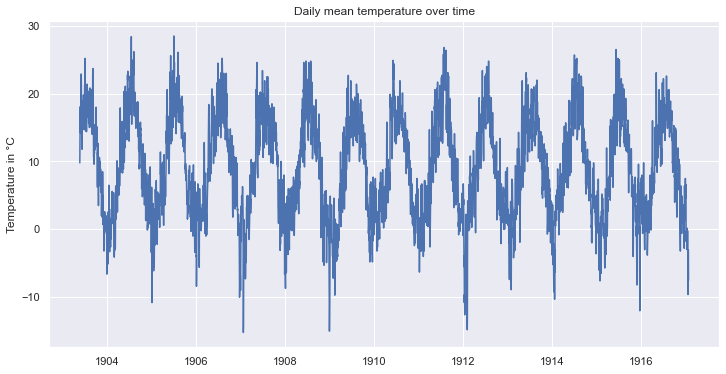

In [13]:
plt.title("Daily mean temperature over time")
plt.ylabel('Temperature in °C')
#plt.ylim(-20,40)
plt.plot(temp.index[10000:15000],temp['meantemperature'][10000:15000])

In [66]:
vtemp = lasttemp.drop([' SOUID',' Q_TG'],axis=1)
vtemp

,meantemperature
Date,
1946-01-01,-3.4
1946-01-02,-3.0
1946-01-03,-2.8
1946-01-04,-2.7
1946-01-05,1.4
...,...
2022-02-24,5.9
2022-02-25,4.4
2022-02-26,4.1


In [67]:
vtemp = vtemp.loc[vtemp['meantemperature'] > -100]

In [68]:
testsplit = vtemp[-4:]
wtemp = vtemp[:-4]

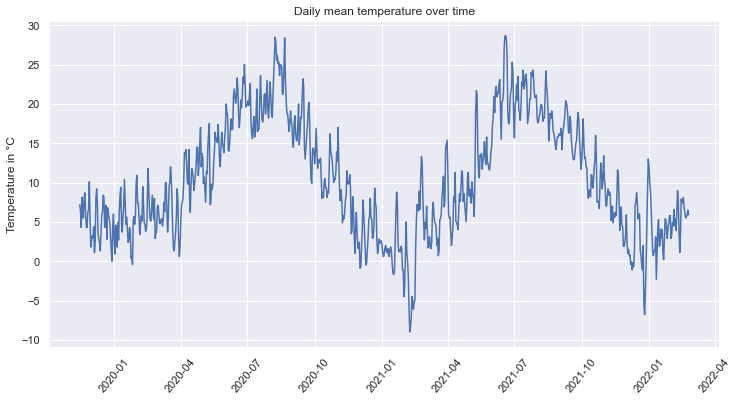

In [69]:
plt.title("Daily mean temperature over time")
plt.ylabel('Temperature in °C')
plt.xticks(rotation = 50)
plt.plot(wtemp['2019-11-15':'2022-02-25'])

In [70]:
type(wtemp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [71]:
wtemp.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='Date', length=27814)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
wtemp['timestep'] = range(len(wtemp))

C:\Users\aoe\AppData\Local\Temp/ipykernel_11576/2948537851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['timestep'] = range(len(wtemp))


In [74]:
X = wtemp[['timestep']] # matrix (or DataFrame)
y = wtemp['meantemperature'] # vector (or Series)

In [75]:
m = LinearRegression()

In [76]:
m.fit(X, y)

LinearRegression()

In [77]:
wtemp['trend'] = m.predict(X)

C:\Users\aoe\AppData\Local\Temp/ipykernel_11576/4116631560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['trend'] = m.predict(X)


<AxesSubplot:xlabel='Date'>

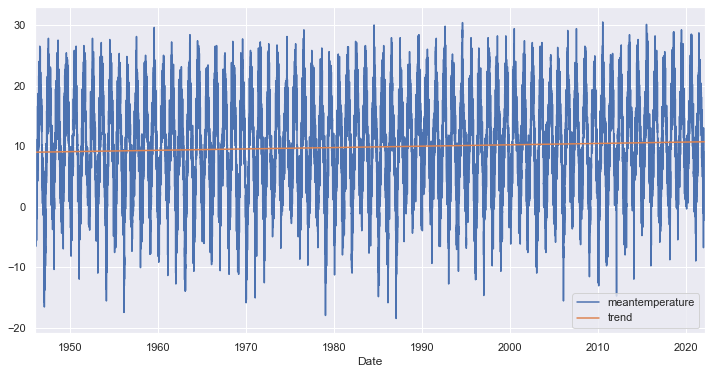

In [78]:
wtemp[['meantemperature', 'trend']].plot()

C:\Users\aoe\AppData\Local\Temp/ipykernel_11576/726575517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['wo_trend'] = wtemp['meantemperature'] - wtemp['trend']


<AxesSubplot:xlabel='Date'>

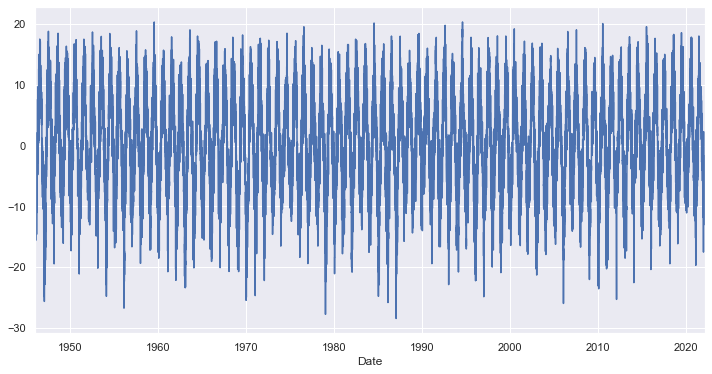

In [79]:
wtemp['wo_trend'] = wtemp['meantemperature'] - wtemp['trend']

wtemp['wo_trend'].plot()

In [80]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(wtemp.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(wtemp.index)

In [81]:
seasonal_dummies

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,
1946-01-01,0,0,0,0,0,0,0,0,0,0,0
1946-01-02,0,0,0,0,0,0,0,0,0,0,0
1946-01-03,0,0,0,0,0,0,0,0,0,0,0
1946-01-04,0,0,0,0,0,0,0,0,0,0,0
1946-01-05,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-20,1,0,0,0,0,0,0,0,0,0,0
2022-02-21,1,0,0,0,0,0,0,0,0,0,0
2022-02-22,1,0,0,0,0,0,0,0,0,0,0


In [82]:
# join the dummies with the flights data frame
wtemp = wtemp.join(seasonal_dummies)

In [83]:
wtemp.tail()

,meantemperature,timestep,trend,wo_trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,
2022-02-20,5.5,27809,10.699217,-5.199217,1,0,0,0,0,0,0,0,0,0,0
2022-02-21,5.7,27810,10.699279,-4.999279,1,0,0,0,0,0,0,0,0,0,0
2022-02-22,5.8,27811,10.699341,-4.899341,1,0,0,0,0,0,0,0,0,0,0
2022-02-23,6.5,27812,10.699403,-4.199403,1,0,0,0,0,0,0,0,0,0,0
2022-02-24,5.9,27813,10.699464,-4.799464,1,0,0,0,0,0,0,0,0,0,0


In [84]:
# Define X and y
X = wtemp.drop(columns=['meantemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies

# y is already defined (the meantemperature)

In [85]:
m.fit(X, y)
# Create a model with trend and seasonality
wtemp['trend + seasonal'] = m.predict(X)
wtemp.head()

,meantemperature,timestep,trend,wo_trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend + seasonal
Date,,,,,,,,,,,,,,,,
1946-01-01,-3.4,0,8.979330,-12.379330,0,0,0,0,0,0,0,0,0,0,0,-0.460457
1946-01-02,-3.0,1,8.979392,-11.979392,0,0,0,0,0,0,0,0,0,0,0,-0.460393
1946-01-03,-2.8,2,8.979454,-11.779454,0,0,0,0,0,0,0,0,0,0,0,-0.460330
1946-01-04,-2.7,3,8.979516,-11.679516,0,0,0,0,0,0,0,0,0,0,0,-0.460267
1946-01-05,1.4,4,8.979578,-7.579578,0,0,0,0,0,0,0,0,0,0,0,-0.460204


<AxesSubplot:xlabel='Date'>

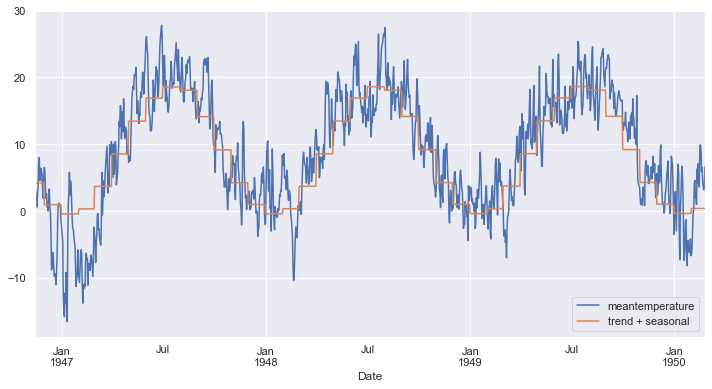

In [87]:
wtemp['1946-11-15':'1950-02-25'][['meantemperature', 'trend + seasonal']].plot()

In [88]:
wtemp['remainder'] = wtemp['meantemperature'] - wtemp['trend + seasonal']

<AxesSubplot:xlabel='Date'>

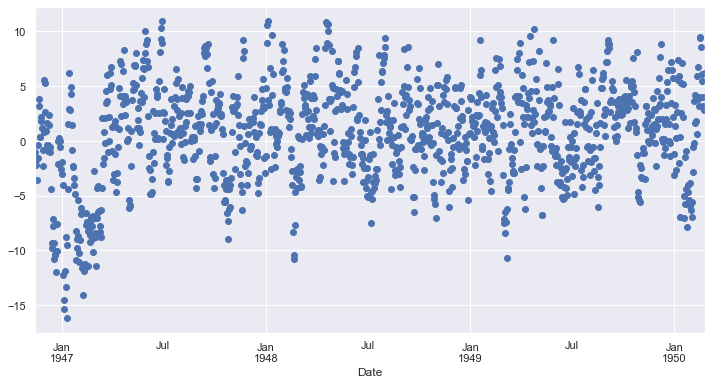

In [90]:
wtemp['1946-11-15':'1950-02-25']['remainder'].plot(style='o')

In [91]:
wtemp.columns

Index(['meantemperature', 'timestep', 'trend', 'wo_trend', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'trend + seasonal',
       'remainder'],
      dtype='object')

In [92]:
rtemp = wtemp.drop(columns=['meantemperature','timestep' ,'trend', 'wo_trend','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12','trend + seasonal'])

In [93]:


rtemp.head()

,remainder
Date,
1946-01-01,-2.939543
1946-01-02,-2.539607
1946-01-03,-2.339670
1946-01-04,-2.239733
1946-01-05,1.860204


In [94]:
# Plot the data
def plot_remainder(df, 
                   title='meantemperature by day over time'):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    df.plot()
    plt.title(title)
    plt.ylabel('daily meantemperature in °C')
    plt.show()

In [95]:
rtemp.head()

,remainder
Date,
1946-01-01,-2.939543
1946-01-02,-2.539607
1946-01-03,-2.339670
1946-01-04,-2.239733
1946-01-05,1.860204


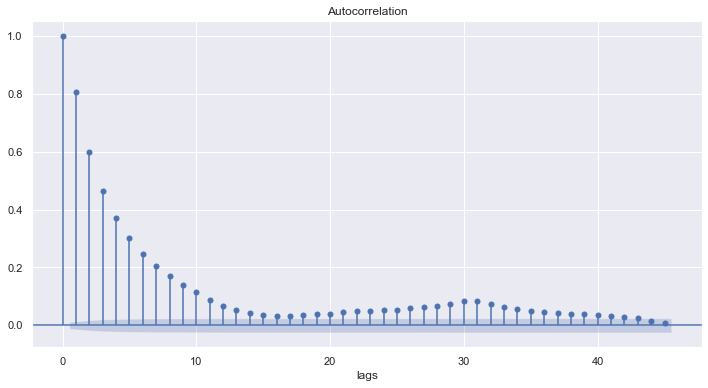

In [96]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rtemp['remainder'])
plt.xlabel('lags');

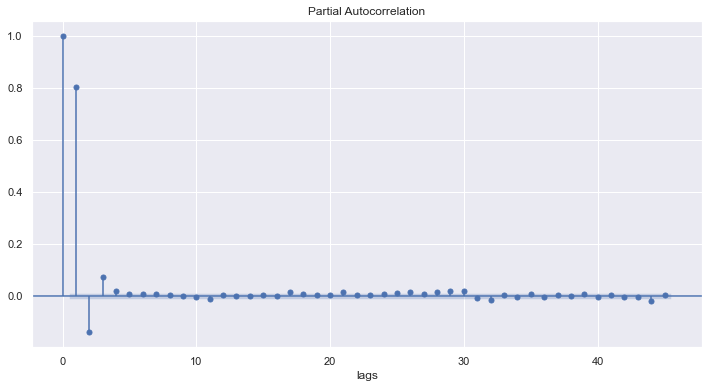

In [97]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(rtemp['remainder'])
plt.xlabel('lags');

In [98]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
selected_order = ar_select_order(rtemp['remainder'], maxlag = 12)

C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [99]:
selected_order.ar_lags

array([1, 2, 3, 4])

In [100]:
wtemp.columns

Index(['meantemperature', 'timestep', 'trend', 'wo_trend', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'trend + seasonal',
       'remainder'],
      dtype='object')

In [101]:
Ntemp = wtemp.drop(columns=['trend', 'wo_trend','trend + seasonal'])

In [102]:
Ntemp['lag1'] = Ntemp['remainder'].shift(1)
Ntemp['lag2'] = Ntemp['remainder'].shift(2)

In [103]:
Ntemp['lag3'] = Ntemp['remainder'].shift(3)
Ntemp['lag4'] = Ntemp['remainder'].shift(4)

In [104]:
Ntemp.head(5)

,meantemperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,remainder,lag1,lag2,lag3,lag4
Date,,,,,,,,,,,,,,,,,,
1946-01-01,-3.4,0,0,0,0,0,0,0,0,0,0,0,0,-2.939543,NaN,NaN,NaN,NaN
1946-01-02,-3.0,1,0,0,0,0,0,0,0,0,0,0,0,-2.539607,-2.939543,NaN,NaN,NaN
1946-01-03,-2.8,2,0,0,0,0,0,0,0,0,0,0,0,-2.339670,-2.539607,-2.939543,NaN,NaN
1946-01-04,-2.7,3,0,0,0,0,0,0,0,0,0,0,0,-2.239733,-2.339670,-2.539607,-2.939543,NaN
1946-01-05,1.4,4,0,0,0,0,0,0,0,0,0,0,0,1.860204,-2.239733,-2.339670,-2.539607,-2.939543


In [105]:
Ntemp.dropna(inplace = True)

In [106]:
Ntemp.head(3)

,meantemperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,remainder,lag1,lag2,lag3,lag4
Date,,,,,,,,,,,,,,,,,,
1946-01-05,1.4,4,0,0,0,0,0,0,0,0,0,0,0,1.860204,-2.239733,-2.339670,-2.539607,-2.939543
1946-01-06,1.9,5,0,0,0,0,0,0,0,0,0,0,0,2.360140,1.860204,-2.239733,-2.339670,-2.539607
1946-01-07,0.4,6,0,0,0,0,0,0,0,0,0,0,0,0.860077,2.360140,1.860204,-2.239733,-2.339670


In [107]:
X = Ntemp.drop(columns=['meantemperature','remainder']) # matrix (or DataFrame)
y = Ntemp['meantemperature'] # vector (or Series)

In [108]:
mN = LinearRegression()
mN.fit(X, y)

LinearRegression()

In [109]:
Ntemp['predictions_full_model'] = mN.predict(X)

<AxesSubplot:xlabel='Date'>

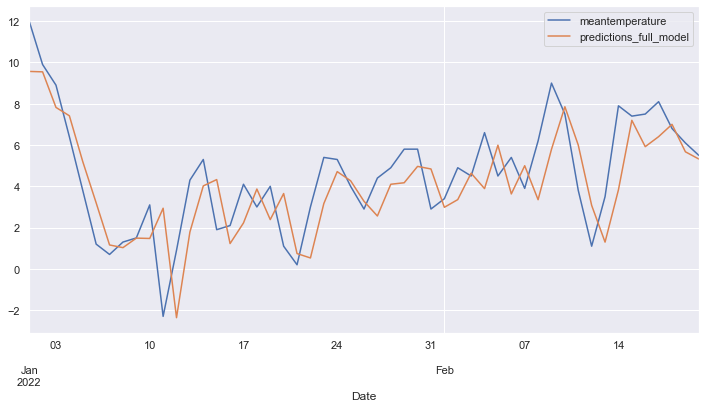

In [110]:
Ntemp['2022-01-01':'2022-02-20'][['meantemperature', 'predictions_full_model']].plot()

**Evaluate model**

In [111]:
X.tail(5)

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
Date,,,,,,,,,,,,,,,,
2022-02-20,27809,1,0,0,0,0,0,0,0,0,0,0,4.049204,4.749267,6.049331,5.449394
2022-02-21,27810,1,0,0,0,0,0,0,0,0,0,0,3.449141,4.049204,4.749267,6.049331
2022-02-22,27811,1,0,0,0,0,0,0,0,0,0,0,3.649078,3.449141,4.049204,4.749267
2022-02-23,27812,1,0,0,0,0,0,0,0,0,0,0,3.749014,3.649078,3.449141,4.049204
2022-02-24,27813,1,0,0,0,0,0,0,0,0,0,0,4.448951,3.749014,3.649078,3.449141


In [232]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# Create a TimeSeriesSplit object
ts_split = TimeSeriesSplit(n_splits=50)

In [233]:
# Split the training data into folds
for i, (train_index, validation_index) in enumerate(ts_split.split(X, y)):
    print(f"""The training data for the {i+1}th iteration are the observations steps 
    {train_index}""")
    print(f"""The validation data for the {i+1}th iteration are the observations steps
    {validation_index}""")
    print('\n')

The training data for the 1th iteration are the observations steps 
    [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228

In [234]:
# Create the time series split
time_series_split = ts_split.split(X, y) 

In [235]:
# Do the cross validation: Remember these are the 'test scores' in the training data.
result = cross_val_score(estimator=mN, 
                         X=X, y=y,
                         cv=time_series_split)
result

array([0.88927002, 0.8949941 , 0.92083299, 0.91906968, 0.91946156,
       0.91623723, 0.89666751, 0.90587858, 0.92419951, 0.8844315 ,
       0.93015628, 0.91889995, 0.90022172, 0.88798502, 0.9291574 ,
       0.91882579, 0.89733979, 0.8958733 , 0.9007616 , 0.9147296 ,
       0.89779517, 0.91069412, 0.89920179, 0.91503143, 0.90007097,
       0.91299042, 0.90663839, 0.8584034 , 0.88223432, 0.89634767,
       0.89760815, 0.89099545, 0.9212042 , 0.90716256, 0.89694803,
       0.90469316, 0.90852701, 0.92924153, 0.91289071, 0.92787036,
       0.90506875, 0.92561113, 0.91633151, 0.91928214, 0.91993731,
       0.9012776 , 0.92531319, 0.92173868, 0.89760992, 0.915969  ])

In [227]:
result.mean()

0.9077936237770927

In [248]:
testsplit['remainder'] = 0

C:\Users\aoe\AppData\Local\Temp/ipykernel_11576/3555153454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testsplit['remainder'] = 0


In [262]:
Ntemp.columns

Index(['meantemperature', 'timestep', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'remainder', 'lag1', 'lag2', 'lag3', 'lag4',
       'predictions_full_model'],
      dtype='object')

In [263]:
predictno = Ntemp.append(testsplit)
predictno.tail(6)

,meantemperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,remainder,lag1,lag2,lag3,lag4,predictions_full_model
Date,,,,,,,,,,,,,,,,,,,
2022-02-23,6.5,27812.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.448951,3.749014,3.649078,3.449141,4.049204,5.096160
2022-02-24,5.9,27813.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.848888,4.448951,3.749014,3.649078,3.449141,5.723144
2022-02-25,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2022-02-26,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2022-02-27,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2022-02-28,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [264]:
predict = predictno.drop(columns=['meantemperature', 'timestep', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'lag1', 'lag2', 'lag3', 'lag4',
       'predictions_full_model'])

In [265]:
predict['timestep'] = range(len(predict))

In [266]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(predict.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(predict.index)

In [267]:
# join the dummies with the flights data frame
predict = predict.join(seasonal_dummies)

In [268]:
predict.tail()

,remainder,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,
2022-02-24,3.848888,27809,1,0,0,0,0,0,0,0,0,0,0
2022-02-25,0.000000,27810,1,0,0,0,0,0,0,0,0,0,0
2022-02-26,0.000000,27811,1,0,0,0,0,0,0,0,0,0,0
2022-02-27,0.000000,27812,1,0,0,0,0,0,0,0,0,0,0
2022-02-28,0.000000,27813,1,0,0,0,0,0,0,0,0,0,0


In [269]:

predict['lag1'] = predict['remainder'].shift(1)
predict['lag2'] = predict['remainder'].shift(2)
predict['lag3'] = predict['remainder'].shift(3)
predict['lag4'] = predict['remainder'].shift(4)

In [270]:
predict.tail()

,remainder,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
Date,,,,,,,,,,,,,,,,,
2022-02-24,3.848888,27809,1,0,0,0,0,0,0,0,0,0,0,4.448951,3.749014,3.649078,3.449141
2022-02-25,0.000000,27810,1,0,0,0,0,0,0,0,0,0,0,3.848888,4.448951,3.749014,3.649078
2022-02-26,0.000000,27811,1,0,0,0,0,0,0,0,0,0,0,0.000000,3.848888,4.448951,3.749014
2022-02-27,0.000000,27812,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,3.848888,4.448951
2022-02-28,0.000000,27813,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,3.848888


In [271]:
predictit = predict.drop(columns=['remainder'])
predictit.tail()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
Date,,,,,,,,,,,,,,,,
2022-02-24,27809,1,0,0,0,0,0,0,0,0,0,0,4.448951,3.749014,3.649078,3.449141
2022-02-25,27810,1,0,0,0,0,0,0,0,0,0,0,3.848888,4.448951,3.749014,3.649078
2022-02-26,27811,1,0,0,0,0,0,0,0,0,0,0,0.000000,3.848888,4.448951,3.749014
2022-02-27,27812,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,3.848888,4.448951
2022-02-28,27813,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,3.848888


In [272]:
predictitA = predictit[4:]
predictitA.tail()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4
Date,,,,,,,,,,,,,,,,
2022-02-24,27809,1,0,0,0,0,0,0,0,0,0,0,4.448951,3.749014,3.649078,3.449141
2022-02-25,27810,1,0,0,0,0,0,0,0,0,0,0,3.848888,4.448951,3.749014,3.649078
2022-02-26,27811,1,0,0,0,0,0,0,0,0,0,0,0.000000,3.848888,4.448951,3.749014
2022-02-27,27812,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,3.848888,4.448951
2022-02-28,27813,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,3.848888


In [273]:
predictitA['predictions_5days'] = mN.predict(predictitA)
predictitA.tail(6)


C:\Users\aoe\AppData\Local\Temp/ipykernel_11576/1431633372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictitA['predictions_5days'] = mN.predict(predictitA)


,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4,predictions_5days
Date,,,,,,,,,,,,,,,,,
2022-02-23,27808,1,0,0,0,0,0,0,0,0,0,0,3.749014,3.649078,3.449141,4.049204,5.095907
2022-02-24,27809,1,0,0,0,0,0,0,0,0,0,0,4.448951,3.749014,3.649078,3.449141,5.722891
2022-02-25,27810,1,0,0,0,0,0,0,0,0,0,0,3.848888,4.448951,3.749014,3.649078,5.034995
2022-02-26,27811,1,0,0,0,0,0,0,0,0,0,0,0.000000,3.848888,4.448951,3.749014,1.633500
2022-02-27,27812,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,3.848888,4.448951,2.394409
2022-02-28,27813,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,3.848888,2.169462


In [274]:
newnew = predictitA.join(predictno[['meantemperature','predictions_full_model']])

newnew.tail(7)

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3,lag4,predictions_5days,meantemperature,predictions_full_model
Date,,,,,,,,,,,,,,,,,,,
2022-02-22,27807,1,0,0,0,0,0,0,0,0,0,0,3.649078,3.449141,4.049204,4.749267,5.091040,5.8,5.091293
2022-02-23,27808,1,0,0,0,0,0,0,0,0,0,0,3.749014,3.649078,3.449141,4.049204,5.095907,6.5,5.096160
2022-02-24,27809,1,0,0,0,0,0,0,0,0,0,0,4.448951,3.749014,3.649078,3.449141,5.722891,5.9,5.723144
2022-02-25,27810,1,0,0,0,0,0,0,0,0,0,0,3.848888,4.448951,3.749014,3.649078,5.034995,4.4,NaN
2022-02-26,27811,1,0,0,0,0,0,0,0,0,0,0,0.000000,3.848888,4.448951,3.749014,1.633500,4.1,NaN
2022-02-27,27812,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,3.848888,4.448951,2.394409,0.5,NaN
2022-02-28,27813,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,3.848888,2.169462,1.7,NaN


<AxesSubplot:xlabel='Date'>

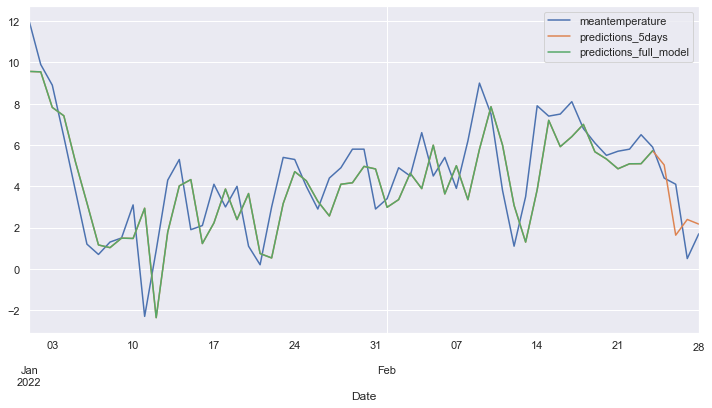

In [279]:
newnew['2022-01-01':'2022-02-28'][['meantemperature', 'predictions_5days','predictions_full_model']].plot()


<AxesSubplot:xlabel='Date'>

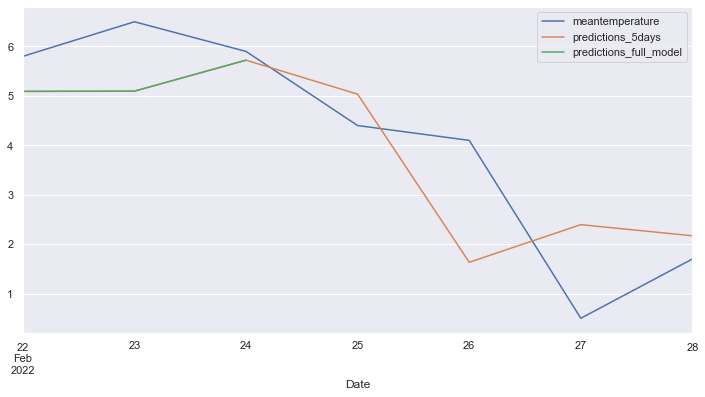

In [281]:
newnew['2022-02-22':'2022-02-28'][['meantemperature', 'predictions_5days','predictions_full_model']].plot()
